# Kinematic Report Tool

## 1) Setup


### Generate the Kinemtatic Model from a hardpoints file
Edit parameters/hardpoints.yaml, then run the code below

In [16]:
from kinematics.kinematic_model import KinematicModel
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as FuncFormatter
import numpy as np

test_kin_model = KinematicModel()
test_kin_model.from_hardpoints('parameters/hardpoints.yaml')
f = test_kin_model.front
r = test_kin_model.rear

## 2) Graphing

### Motion Ratio

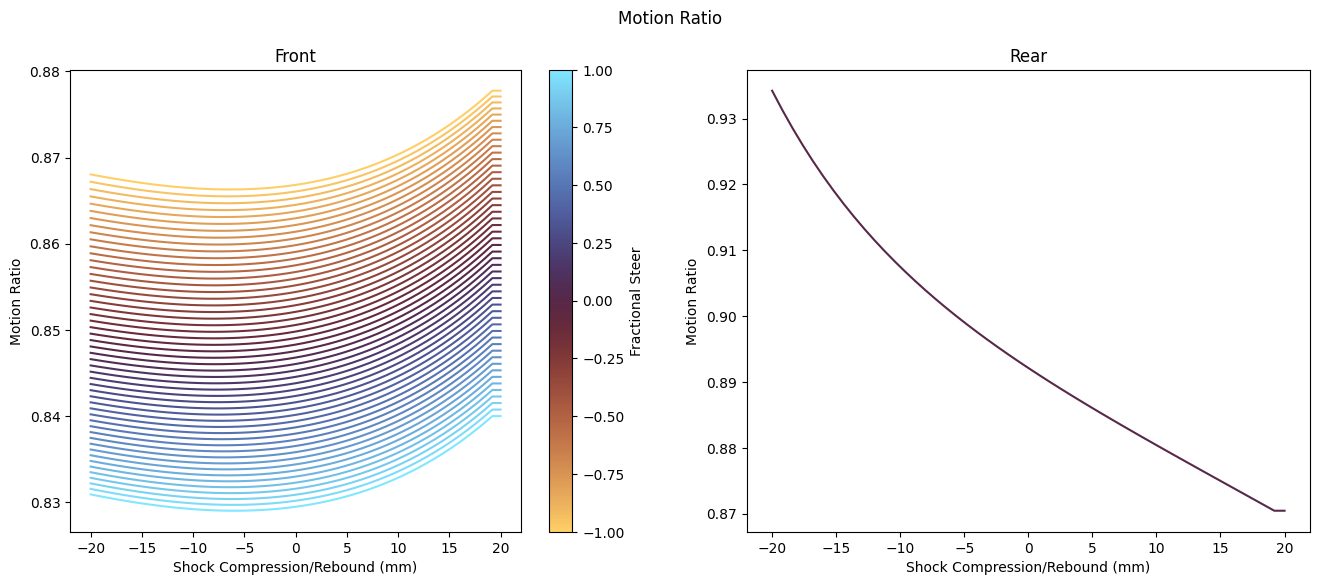

In [17]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Motion Ratio')
fig.tight_layout()
n = len(f[0,:,0])
colormap = plt.cm.managua
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.managua,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0],f[:,i,2])

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Motion Ratio')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],r[:,0,2],color=colors[n//2])
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Motion Ratio')
ax2.set_title('Rear')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer');

### Camber Gain and Bump Steer (Neutral Steer)


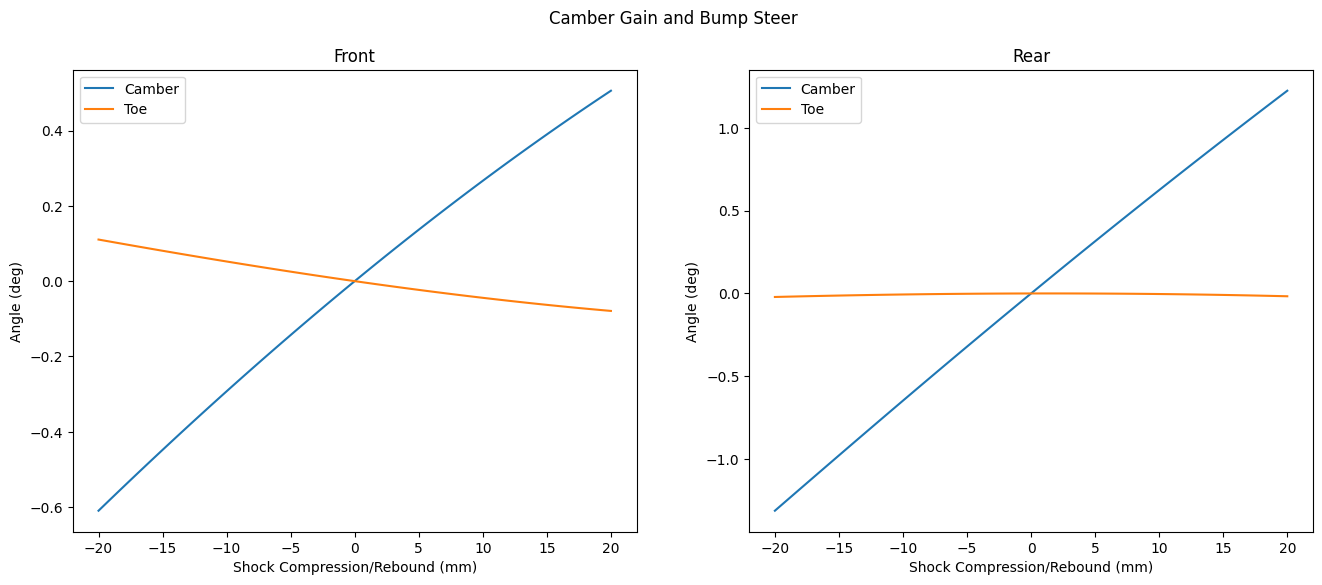

In [18]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Camber Gain and Bump Steer')
fig.tight_layout()
n = len(f[0,:,0])
ax1 = fig.add_subplot(121)
ax1.plot(f[:,n//2,0],np.rad2deg(f[:,n//2,9]), label = "Camber")
ax1.plot(f[:,n//2,0],np.rad2deg(f[:,n//2,10]), label = "Toe")
ax1.legend()
ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Front')

ax2 = fig.add_subplot(122)
ax2.plot(r[:,0,0],np.rad2deg(r[:,0,9]), label = "Camber")
ax2.plot(r[:,0,0],np.rad2deg(r[:,0,10]), label = "Toe")
ax2.set_xlabel('Shock Compression/Rebound (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.legend()
ax2.set_title('Rear');

### Front Camber Gain (Non-Neutral Steer)

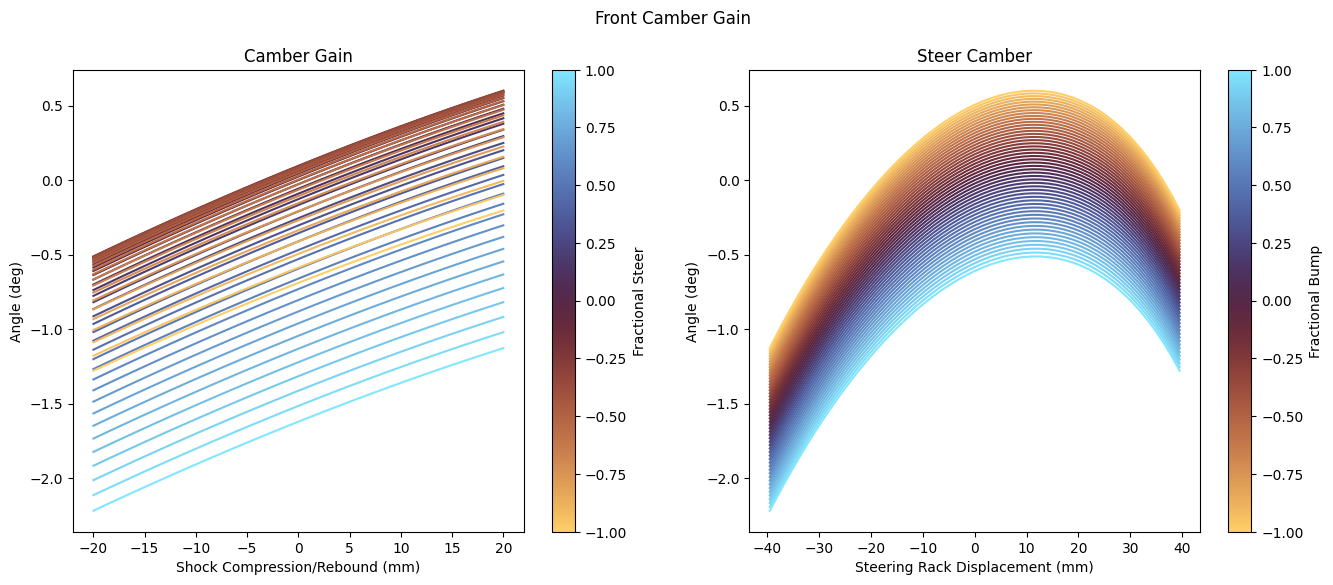

In [19]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Front Camber Gain')
fig.tight_layout()

n = len(f[0,:,0])
colormap = plt.cm.managua
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.managua,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[:,i,0], np.rad2deg(f[:,i,9]))

for i, line in enumerate(ax1.lines):
    line.set_color(colors[i])

ax1.set_xlabel('Shock Compression/Rebound (mm)')
ax1.set_ylabel('Angle (deg)')
ax1.set_title('Camber Gain')

n = len(f[:,0,0])
colormap = plt.cm.managua
colors = [colormap(i) for i in np.linspace(1, 0, n)]
norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.managua,norm=norm)

ax2 = fig.add_subplot(122)
for i in range(n):
    ax2.plot(f[i,:,1], np.rad2deg(f[i,:,9]))

for i, line in enumerate(ax2.lines):
    line.set_color(colors[i])

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Angle (deg)')
ax2.set_title('Steer Camber')

cbar = plt.colorbar(scalar_mappable,ax=ax1,label='Fractional Steer')
cbar = plt.colorbar(scalar_mappable,ax=ax2,label='Fractional Bump');

### Steering and Ackermann

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

fig = plt.figure(figsize=(16,6))
fig.suptitle('Steering')
fig.tight_layout()
n = len(f[:,0,0])
colormap = plt.cm.managua
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.managua,norm=norm)

ax1 = fig.add_subplot(121)

for i in range(n):
    ax1.plot(f[i,:,1], np.rad2deg(f[i,:,10]))

for i, line in enumerate(ax1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])

ax1.set_xlabel('Steering Rack Displacement (mm)')
ax1.set_ylabel('Steer Angle (deg)')
ax1.set_title('Steering')

## EDIT ZOOM LEVEL HERE ###
zoom1 = 75
## EDIT ZOOM POINT HERE [-1,1] ###
t= 0

zoom2 = zoom1*3
ax1_1 = zoomed_inset_axes(ax1, zoom=zoom1, loc='upper right')

for i in range(n):
    ax1_1.plot(f[i,:,1],np.rad2deg(f[i,:,10]))
for i, line in enumerate(ax1_1.lines):
    # line.set_color(colors[abs(i-n//2)*2])
    line.set_color(colors[i])
ax1_1.set_aspect('equal', adjustable='box')
m = len(f[0,:,1])
idx = m//2 + int(t*m/2)
x1, y1 = f[n//2,idx,1], f[n//2,idx,10]

ax1_1.set_xlim(x1 + f[n//2,0,1]/zoom2, x1 + f[n//2,-1,1]/zoom2)
ax1_1.set_ylim(np.rad2deg(y1 - f[n//2,0,10]/zoom2), np.rad2deg(y1 - f[n//2,-1,10]/zoom2))
mark_inset(ax1, ax1_1, loc1=3, loc2=3)

colormap = plt.cm.managua
colors = [colormap(i) for i in np.linspace(1, 0, n)]

norm = mpl.colors.Normalize(vmin=-1,vmax=1)
scalar_mappable = plt.cm.ScalarMappable(cmap=plt.cm.managua,norm=norm)
fig.colorbar(scalar_mappable,ax=ax1,label='Fractional Bump')

ackermann = (f[n//2,:,10] - f[n//2,::-1,10])
ax2 = fig.add_subplot(122)
ax2.plot(f[n//2,:,1], ackermann)

ax2.set_xlabel('Steering Rack Displacement (mm)')
ax2.set_ylabel('Steering angle delta (deg)')
ax2.set_title('Ackermann Steering');

### Contact Patch Configuration Spaces

In [ ]:
fig = plt.figure(figsize=(16,6))
fig.suptitle('Contact Patch Configuration Spaces')
# fig.subplots_adjust(left=0.1, bottom=None, right=0.9, top=None, wspace=0.1, hspace=None)
fig.tight_layout()
ax1 = fig.add_subplot(121,projection="3d")
ax1.plot_surface(f[:,:,3],f[:,:,4],f[:,:,5])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('Front')

ax2 = fig.add_subplot(122,projection="3d")
ax2.plot(r[:,0,3],r[:,0,4],r[:,0,5])
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Rear');